# Supervised Learning: Linear Regression

In this section we will be going over linear regression. We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding lessons.

If you're interested in the deeper mathematics of linear regession methods, check out the [wikipedia page](http://en.wikipedia.org/wiki/Linear_regression) and also check out Andrew Ng's wonderful lectures for free on [youtube](https://www.youtube.com/watch?v=5u4G23_OohI).

In this section we will be working through linear regression with the following steps:

    Step 1: Getting and setting up the data.
    Step 2: Visualizing current data.
    Step 3: The mathematics behind the Least Squares Method.
    Step 4: Using Numpy for a Univariate Linear Regression.
    Step 5: Getting the error.
    Step 6: Using scikit learn to implement a multivariate regression.
    Step 7: Using Training and Validation.  
    Step 8: Predicting Prices
    

### Step 1: Getting and setting up the data.

We'll start by looking a an example of a dataset from scikit-learn. First we'll import our usual data analysis imports, then sklearn's built-in boston dataset.

In [1]:
import numpy as np
import pandas as pd

Imports for plotting

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Now import dataset from scikit learn as well as the linear_model module. Note: You may have to run a download, scikit learn will read an error and prompt you to if you don't have the datasets.

In [3]:
from sklearn.datasets import load_boston

Next we'll download the data set

In [4]:
# Load the housing dataset
boston = load_boston()

/Users/yektaamirkhalili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

Let's see what the data set contains

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Step 2: Visualizing current data

You should always try to do a quick visualization fo the data you have. Let's go ahead an make a histogram of the prices.

Text(0, 0.5, 'Number of Houses')

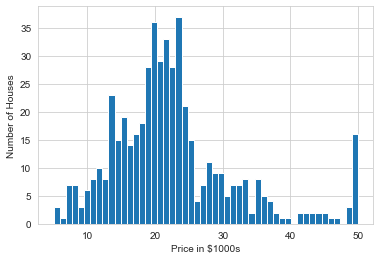

In [6]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of Houses')

Interesting, now let's see a scatter plot of one feature, versus the target. In this case we'll use the housing price versus the number of rooms in the dwelling.

Text(0.5, 0, 'Number of rooms')

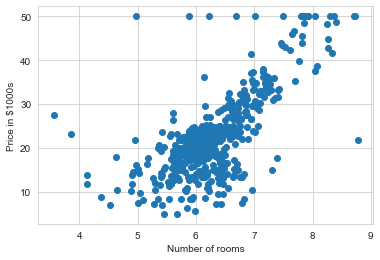

In [7]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel("Price in $1000s")
plt.xlabel('Number of rooms')

Great! Now we can make out a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense! Now let's use scikit learn to see if we can fit the data linearly.

Let's try to do the following:

    1.) Use pandas to transform the boston dataset into a DataFrame: 
    
    2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [8]:
# reset data as pandas DataFrame
boston_df = pd.DataFrame(boston.data)
# label columns
boston_df.columns = boston.feature_names
#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now let's add the target of the boston data set, the price. We'll create a new column in our DataFrame.

In [9]:
# Set price column for target
boston_df['Price'] = boston.target

Now let's see the resultign DataFrame!

In [10]:
# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


You could use **seaborn** here to do a linear fit automatically!

/Users/yektaamirkhalili/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


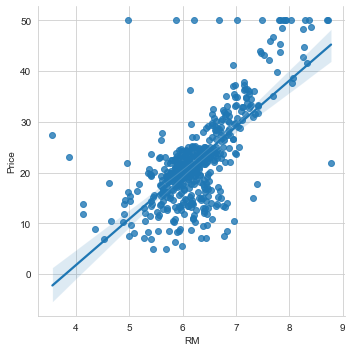

In [11]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data=boston_df)

However, we won't be able to do this when we move to more complicated regression models, so we'll stay focused on using the scikit learn library!

### Step 3: The mathematics behind the Least Squares Method.

In this particular lecture we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

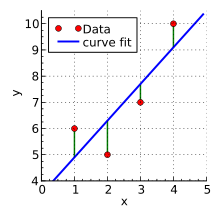

In [ ]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations  to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here. If you want further informatino on the mathematics of the above formulas, check out this great [video](https://www.youtube.com/watch?v=Qa2APhWjQPc).

For now, we'll use numpy to do a simple single variable linear regression. Afterwards we'll unleash the power of scikit learn to do a full multivariate linear regression.

### Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [43]:
X = boston_df['RM']

X[:5]

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [41]:
X.ndim

1

In [46]:
X = np.array(X)

X[:5]

array([6.575, 6.421, 7.185, 6.998, 7.147])

In [47]:
X.ndim

1

In [48]:
X.reshape(-1,1).ndim

2

In [49]:
X[:5]

array([6.575, 6.421, 7.185, 6.998, 7.147])

In [50]:
Y = boston_df['Price']

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation:
$$y=mx+b$$
which we can rewrite using matrices:
$$y=Ap$$
where:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$
and
$$p= \begin{bmatrix}m \\b\end{bmatrix}$$

This is the same as the first equation if you carry out the linear algebra. 
So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [51]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ])

Great! Now we can get the best fit values!

In [52]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X.astype(float), Y, rcond=None)[0]

In [54]:
m

9.102108981180315

In [55]:
b

-34.67062077643858

Finally let's plot it all together! Note that we use the original format of the boston information. We only did our matrix transformations to utilize the numpy least square method.

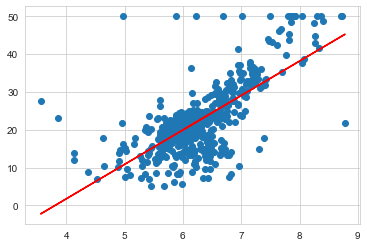

In [56]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

### Step 5: Getting the error 

Great! We've just completed a single variable regression using the least squares method with Python! Let's see if we can find the error in our fitted line. Checking out the documentation [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier. 

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [59]:
# Get the resulting array
result = np.linalg.lstsq(X,Y, rcond = None)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

### Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [60]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

Next, we create a LinearRegression object, afterwards, type lm. then press tab to see the list of methods availble on this object.

In [61]:
# Create a LinearRegression Object
lreg = LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](http://en.wikipedia.org/wiki/Coefficient_of_determination)





We'll start the multi variable regression analysis by seperating our boston dataframe into the data columns and the target columns:

In [62]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df['Price']

reshape price column to numpy array

In [63]:
x = boston_df.RM
numx = x.to_numpy()
x_array = numx.reshape(-1,1)

Finally, we're ready to pass the X and Y using the linear regression object.

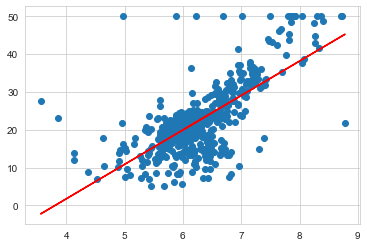

In [64]:
# Implement Linear Regression
lreg.fit(x_array,Y_target)
plt.scatter(boston_df.RM,boston_df.Price)
plt.plot(x_array,lreg.predict(x_array),'r')

In [65]:
lreg.fit(X_multi,Y_target)

LinearRegression()

Let's go ahead check the intercept and number of coefficients.

In [66]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.46 


In [67]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


Great! So we have basically made an equation for a line, but instead of just oneo coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the [documentation](http://scikit-learn.org/stable/modules/linear_model.html) for this equation:
$$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept 

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

In [68]:
# Set a DataFrame from the Features
coeff_df = pd.DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms.

Now let's move on to Predicting prices!

## Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lreg,x_array,boston_df.Price,cv=10,scoring='explained_variance')
scores

array([ 0.56990621,  0.82956566, -0.36287117,  0.72233486,  0.83901529,
        0.77703308,  0.76163618, -0.41293998, -1.5410192 ,  0.18802904])

for other scoring methods please see: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Step 7: Using Training and Validation 

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is *randomly*.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [70]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_array,boston_df.Price)

Let's go ahead and see what the output of the train_test_split was:

In [71]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 1) (127, 1) (379,) (127,)


Great! Now that we have our training and testing sets we can continue on to predicint gprices based on the multiple variables.

### Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [72]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

Now run a prediction on both the X training set and the testing set.

In [73]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Now we will get the mean square error

In [74]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )

Fit a model X_train, and calculate MSE with Y_train: 40.34
Fit a model X_train, and calculate MSE with X_test and Y_test: 53.54


It looks like our mean square error between our training and testing was pretty close.